# Mall Customer Segmentation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Accessing the dataset
customer = pd.read_csv('Mall_customers.csv')
customer

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
# Preprocessing

## Dropping Customer ID
customer = customer.drop(['CustomerID'], axis = 1)
print('customer',customer)

KeyError: "['CustomerID'] not found in axis"

In [6]:
## Converting categorical to numeric (one hot encoding)
cust = pd.get_dummies(customer)
print('cust',cust)

cust      Age  Annual Income (k$)  Spending Score (1-100)  Gender_Female  \
0     19                  15                      39              0   
1     21                  15                      81              0   
2     20                  16                       6              1   
3     23                  16                      77              1   
4     31                  17                      40              1   
..   ...                 ...                     ...            ...   
195   35                 120                      79              1   
196   45                 126                      28              1   
197   32                 126                      74              0   
198   32                 137                      18              0   
199   30                 137                      83              0   

     Gender_Male  
0              1  
1              1  
2              0  
3              0  
4              0  
..           ...  
195      

In [7]:
## Standardization

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(cust)
X

array([[-1.42456879, -1.73899919, -0.43480148, -1.12815215,  1.12815215],
       [-1.28103541, -1.73899919,  1.19570407, -1.12815215,  1.12815215],
       [-1.3528021 , -1.70082976, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.70082976,  1.04041783,  0.88640526, -0.88640526],
       [-0.56336851, -1.66266033, -0.39597992,  0.88640526, -0.88640526],
       [-1.20926872, -1.66266033,  1.00159627,  0.88640526, -0.88640526],
       [-0.27630176, -1.62449091, -1.71591298,  0.88640526, -0.88640526],
       [-1.13750203, -1.62449091,  1.70038436,  0.88640526, -0.88640526],
       [ 1.80493225, -1.58632148, -1.83237767, -1.12815215,  1.12815215],
       [-0.6351352 , -1.58632148,  0.84631002,  0.88640526, -0.88640526],
       [ 2.02023231, -1.58632148, -1.4053405 , -1.12815215,  1.12815215],
       [-0.27630176, -1.58632148,  1.89449216,  0.88640526, -0.88640526],
       [ 1.37433211, -1.54815205, -1.36651894,  0.88640526, -0.88640526],
       [-1.06573534, -1.54815205,  1.0

In [8]:
# Converting array to dataframe
X = pd.DataFrame(X, columns = cust.columns)
X

,Age,Annual Income (k$),Spending Score (1-100),Gender_Female,Gender_Male
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405
...,...,...,...,...,...
195,-0.276302,2.268791,1.118061,0.886405,-0.886405
196,0.441365,2.497807,-0.861839,0.886405,-0.886405
197,-0.491602,2.497807,0.923953,-1.128152,1.128152
198,-0.491602,2.917671,-1.250054,-1.128152,1.128152


Now all the features are numeric --> ready for logic

## Dimensionality reduction

#### Using some dimensionality reduction (in order to visualize the data easily and differentiate among clusters)
PCA - Linearly separated <br>
LDA - Classification <br>
LLE - Manifold <br>
tSNE - Different t distributions (similar to normal distribution)<br>

In [9]:
# We use tSNE

from sklearn.manifold import TSNE
# Parameters: n_components = no. of clusters; perplexity = no. of neighbours

tsne = TSNE(n_components = 2, random_state = 100)

type(tsne)

sklearn.manifold._t_sne.TSNE

^^ Using this object we transform our df into new dimensions

In [10]:
X_tsne = tsne.fit_transform(X)

C:\Users\Urvi Sharma\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Urvi Sharma\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [11]:
X_tsne

array([[ 13.742989 , -10.150426 ],
       [ 14.02748  ,  -8.550854 ],
       [-10.936391 ,   3.5889792],
       [ -8.2719145,   7.8462076],
       [-11.331948 ,   4.896708 ],
       [ -8.388392 ,   7.9244766],
       [-11.59382  ,   3.1148205],
       [ -7.8547893,   8.482502 ],
       [ 13.784817 , -14.67874  ],
       [ -8.590201 ,   7.4308343],
       [ 13.600574 , -14.865328 ],
       [ -7.3235292,   8.178741 ],
       [-13.269284 ,   1.8991803],
       [ -8.454644 ,   7.977522 ],
       [ 13.482756 , -12.509849 ],
       [ 13.834272 ,  -8.55989  ],
       [-11.744753 ,   4.4423738],
       [ 13.643496 ,  -9.113793 ],
       [ 13.063439 , -13.698295 ],
       [ -7.3385396,   8.1984005],
       [ 13.1889925, -11.681824 ],
       [ 13.421404 ,  -8.824541 ],
       [-12.442577 ,   2.4455643],
       [ 13.333221 ,  -9.116437 ],
       [-13.137483 ,   2.1783068],
       [ 13.420705 ,  -8.440628 ],
       [-13.083287 ,   3.4043512],
       [ 12.964891 ,  -9.925661 ],
       [-12.49134  ,

## Visualization

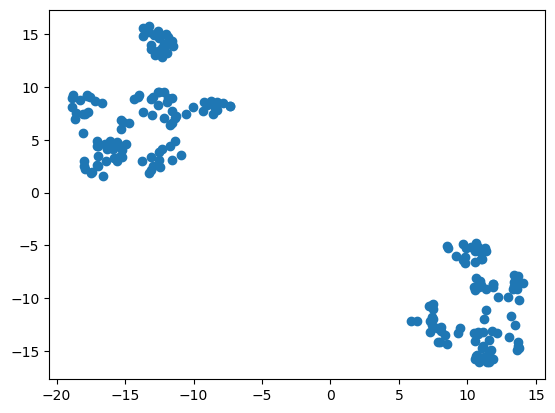

In [12]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1]) # All the rows & 0th column along X axis, all the rows & 1st column along Y axis

### Findings:

1. Cluster formation is clear

2. No. of clusters may be 2

## Trial-----------

C:\Users\Urvi Sharma\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Urvi Sharma\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


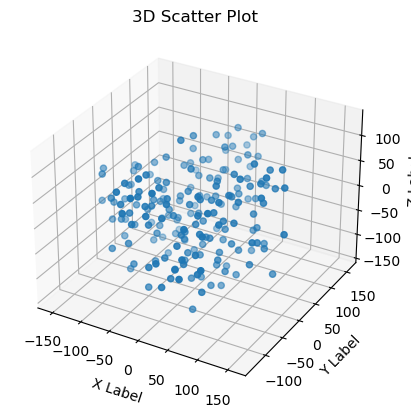

In [15]:
tsne1 = TSNE(n_components = 3, random_state = 100)
Xtsne = tsne1.fit_transform(X)
from mpl_toolkits.mplot3d import Axes3D

# generate some random 3D data
x = Xtsne[:, 0]
y = Xtsne[:, 1]
z = Xtsne[:, 2]

# initialize the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# plot the 3D data
ax.scatter(x, y, z)

# set labels and title
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_title('3D Scatter Plot')

# show the plot
plt.show()

## ----------Trial over

## Clustering using GMM

In [18]:
from sklearn.mixture import GaussianMixture

n_comps = np.arange(1, 20, 1)
aic_score = []
bic_score = []
for n in n_comps:
    model = GaussianMixture(n_components = n,
                           random_state = 100,
                           n_init = 5)
    model.fit(X)
    aic_score.append(model.aic(X))
    bic_score.append(model.bic(X))
    

C:\Users\Urvi Sharma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Urvi Sharma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Urvi Sharma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Urvi Sharma\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have

In [21]:
print('AIC Score:\n', aic_score, '\n\nBIC Score:\n', bic_score)

AIC Score:
 [28.980337349201807, -2766.4799897414314, -2796.645539935852, -2815.0972035530413, -2818.4182407773014, -2857.3052267941066, -2851.1477319684964, -2854.6876091568947, -2856.0594160258897, -2849.3510747637133, -2844.513353156751, -2817.6041366812447, -2835.039832047334, -2792.9756725151074, -2777.772644081489, -2806.727320535603, -2759.8096382744543, -2752.8811886755166, -2751.286786297883] 

BIC Score:
 [94.94668468016253, -2631.2489777129617, -2592.1498632098737, -2541.336862129554, -2475.3932346563056, -2445.015555975602, -2369.593396452483, -2303.8686089433727, -2235.975751114859, -2160.0027451551737, -2085.900358850702, -1989.7264776776876, -1937.8975083462683, -1826.5686841165327, -1742.1009909854056, -1701.791002742011, -1585.6086557833535, -1509.415541486907, -1438.5564744117642]


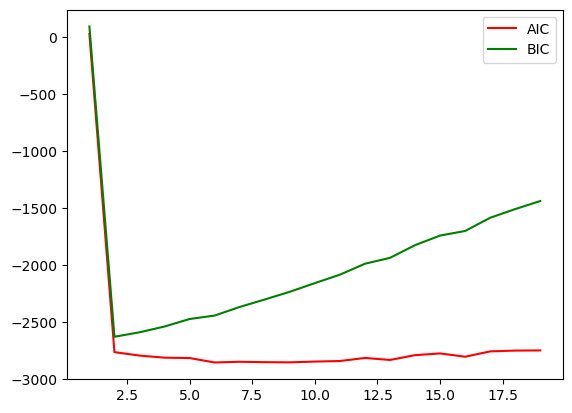

In [25]:
plt.plot(n_comps, aic_score, c = 'r', label = 'AIC')
plt.plot(n_comps, bic_score, c = 'g', label = 'BIC')
plt.legend();

## Remark

No. of clusters = 2

## Creating a GM model with 2 clusters

In [27]:
gm = GaussianMixture(n_components = 2, random_state = 100, n_init = 5)

In [28]:
gm.fit(X)

GaussianMixture(n_components=2, n_init=5, random_state=100)

In [38]:
pred = gm.predict(X)
pred

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0], dtype=int64)

In [33]:
print('GM Means:\n', gm.means_, '\n\nGM Covariances:\n', gm.covariances_, '\n\nGM Weights:\n',gm.weights_)

GM Means:
 [[ 0.06866767  0.06363885 -0.0655555  -1.12815215  1.12815215]
 [-0.05395317 -0.05000195  0.05150789  0.88640526 -0.88640526]] 

GM Covariances:
 [[[ 1.22567626e+00 -1.04066272e-01 -3.33359637e-01  0.00000000e+00
    0.00000000e+00]
  [-1.04066272e-01  1.02207728e+00 -2.57837238e-02  0.00000000e+00
    0.00000000e+00]
  [-3.33359637e-01 -2.57837238e-02  1.15955344e+00  0.00000000e+00
    0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e-06
    0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
    1.00000000e-06]]

 [[ 8.16068940e-01  5.34957132e-02 -3.16092284e-01  0.00000000e+00
    0.00000000e+00]
  [ 5.34957132e-02  9.76973092e-01  4.37956955e-02 -2.81736038e-32
    0.00000000e+00]
  [-3.16092284e-01  4.37956955e-02  8.68608681e-01 -5.28255070e-33
    0.00000000e+00]
  [ 0.00000000e+00 -2.81736038e-32 -5.28255070e-33  1.00000000e-06
    0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.0000

## Adding cluster labels to DF

In [35]:
customer # og dataset

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


## Insights

In [39]:
customer['Label'] = pred

In [40]:
customer['Label'].value_counts()

1    112
0     88
Name: Label, dtype: int64

In [41]:
customer['Label'].value_counts(normalize = True)

1    0.56
0    0.44
Name: Label, dtype: float64

In [42]:
customer

,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,Male,19,15,39,0
1,Male,21,15,81,0
2,Female,20,16,6,1
3,Female,23,16,77,1
4,Female,31,17,40,1
...,...,...,...,...,...
195,Female,35,120,79,1
196,Female,45,126,28,1
197,Male,32,126,74,0
198,Male,32,137,18,0


In [45]:
customer[customer['Gender'] =='Male']

,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,Male,19,15,39,0
1,Male,21,15,81,0
8,Male,64,19,3,0
10,Male,67,19,14,0
14,Male,37,20,13,0
...,...,...,...,...,...
187,Male,28,101,68,0
192,Male,33,113,8,0
197,Male,32,126,74,0
198,Male,32,137,18,0


In [44]:
customer[customer['Gender'] =='Male'][customer['Label'] == 0]

C:\Users\Urvi Sharma\AppData\Local\Temp\ipykernel_17348\2018768063.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  customer[customer['Gender'] =='Male'][customer['Label'] == 0]


,Gender,Age,Annual Income (k$),Spending Score (1-100),Label
0,Male,19,15,39,0
1,Male,21,15,81,0
8,Male,64,19,3,0
10,Male,67,19,14,0
14,Male,37,20,13,0
...,...,...,...,...,...
187,Male,28,101,68,0
192,Male,33,113,8,0
197,Male,32,126,74,0
198,Male,32,137,18,0


^^ No. of rows (88) with males matches with no. of rows of males + label 0

Therefore, all male customers belong to one segment

All Males form a market segment, constituting 44% of the customer base.

In [46]:
customer[customer['Gender'] =='Female'][customer['Label'] == 0]

C:\Users\Urvi Sharma\AppData\Local\Temp\ipykernel_17348\3591794436.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  customer[customer['Gender'] =='Female'][customer['Label'] == 0]


,Gender,Age,Annual Income (k$),Spending Score (1-100),Label


^^ Therefore, all the female customers belong to the other segment (with label '1')
All female customers form a segment, constituting 56 % of the customer base.


In [ ]:
customer[customer['Gender']=='Female'][customer['Label']==1]

In [48]:
## 10000 samples

gm.sample(10000)

(array([[-0.48030421,  0.82947775,  1.35126332, -1.12793097,  1.12866637],
        [ 1.16826019,  0.17668898, -0.857043  , -1.12771699,  1.12769412],
        [ 1.15541312, -0.53360973,  0.17702385, -1.12868343,  1.12804774],
        ...,
        [-0.72225881,  0.08541431,  0.89346945,  0.8864895 , -0.88654587],
        [ 0.22157311, -0.21648202, -1.40252937,  0.88543931, -0.88553845],
        [ 0.44325619,  0.15695807, -0.86917668,  0.88626531, -0.88554246]]),
 array([0, 0, 0, ..., 1, 1, 1]))